In [ ]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'

--2020-10-25 13:56:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-25 13:56:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-25 13:56:39--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!unzip 'glove.6B.zip'

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import math
import numpy as np
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
import string  
import random
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
links = ['https://drive.google.com/file/d/1i4HC7eqWcfA2Nk3Vgvw4tZ_NiePkhy1d/view?usp=sharing','https://drive.google.com/file/d/1OShKm0fax7B4esbppEJDn-KRuXwje_M6/view?usp=sharing','https://drive.google.com/file/d/1wJyUnNtnX7GdyF_8jlTjZIIO8YMHWdu3/view?usp=sharing','https://drive.google.com/file/d/12jtQYpH8-47_KCHw6I0H9rHe0zciQAv3/view?usp=sharing','https://drive.google.com/file/d/1o2Mo_DkS7zkKM_hPYqOjfHIQ1vKrP6Kd/view?usp=sharing']
fId = []

for link in links :
  link = link.split('/d/')[-1].split('/view')[0]
  fId.append(link)

fnames = ['a.txt','b.txt','c.txt','d.txt','e.txt']
for i in range(len(fnames)) :
  downloaded = drive.CreateFile({'id':fId[i]}) 
  downloaded.GetContentFile(fnames[i]) 

In [ ]:
f = open('a.txt','r')
a = f.read()
f.close()

f = open('b.txt','r')
b = f.read()
f.close()

f = open('c.txt','r')
c = f.read()
f.close()

f = open('d.txt','r')
d = f.read()
f.close()

f = open('e.txt','r')
e = f.read()
f.close()

In [ ]:
f = open('a.txt','r')
a = f.read()
f.close()

f = open('b.txt','r')
b = f.read()
f.close()

f = open('c.txt','r')
c = f.read()
f.close()

f = open('d.txt','r')
d = f.read()
f.close()

f = open('e.txt','r')
e = f.read()
f.close()

In [ ]:
! ls

adc.json  c.txt  glove.6B.100d.txt  glove.6B.50d.txt  sample_data
a.txt	  d.txt  glove.6B.200d.txt  glove.6B.zip
b.txt	  e.txt  glove.6B.300d.txt  glove.6B.zip.1


In [ ]:
vectors = {}
word2vec = {}
words = []
with open('glove.6B.300d.txt') as f:
    for line in tqdm(f, total=400000):
        word, vector = line.split(maxsplit=1)
        words.append(word)
        v = np.fromstring(vector, sep=' ', dtype='float32')
        vectors[word] = v 
        word2vec[word] = v / np.linalg.norm(v)

100%|██████████| 400000/400000 [00:34<00:00, 11437.87it/s]


In [ ]:
df = pd.DataFrame(vectors)
df = df.transpose() 

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
the,0.046560,0.213180,-0.007436,-0.458540,-0.035639,0.236430,-0.288360,0.215210,-0.134860,-1.6413,-0.26091,0.032434,0.056621,-0.043296,-0.021672,0.224760,-0.075129,-0.067018,-0.142470,0.038825,-0.189510,0.29977,0.393050,0.178870,-0.173430,-0.211780,0.236170,-0.063681,-0.423180,-0.116610,0.093754,0.172960,-0.33073,0.491120,-0.68995,-0.092462,0.247420,-0.179910,0.097908,0.083118,...,-0.287970,-0.058996,-0.032436,-0.004701,-0.170520,-0.034741,-0.114890,0.075093,0.099526,0.048183,-0.073775,-0.418170,0.004127,0.44414,-0.16062,0.142940,-2.2628,-0.027347,0.81311,0.774170,-0.256390,-0.115760,-0.119820,-0.21363,0.028429,0.27261,0.031026,0.096782,0.006777,0.140820,-0.013064,-0.296860,-0.079913,0.195000,0.031549,0.285060,-0.087461,0.009061,-0.209890,0.053913
",",-0.255390,-0.257230,0.131690,-0.042688,0.218170,-0.022702,-0.178540,0.107560,0.058936,-1.3854,0.58509,0.036501,-0.198460,0.196130,0.409290,0.157020,-0.153050,0.050447,0.300450,-0.112950,-0.017043,0.18593,0.199820,0.200530,-0.631410,-0.126220,0.295100,-0.262820,-0.158310,0.001238,0.011784,0.587580,-0.15914,0.277310,-0.82343,-0.211340,0.013414,0.196370,-0.414700,0.001028,...,-0.063187,-0.245530,-0.059751,0.068787,-0.116270,-0.008340,0.005204,-0.201590,-0.023663,0.175620,-0.314750,-0.111620,-0.124920,0.10949,-0.26913,0.348930,-1.6997,-0.244700,0.30292,0.056720,-0.317370,0.083612,0.095949,-0.17590,0.102350,0.36808,-0.343800,0.206070,0.191350,0.109920,0.075968,-0.014359,-0.073794,0.221760,0.146520,0.566860,0.053307,-0.232900,-0.122260,0.354990
.,-0.125590,0.013630,0.103060,-0.101230,0.098128,0.136270,-0.107210,0.236970,0.328700,-1.6785,0.22393,0.124090,-0.086708,0.330100,0.343750,-0.000876,-0.296580,0.244170,-0.115920,-0.035742,-0.010830,0.20776,0.292850,-0.073491,-0.185980,-0.200900,-0.095366,0.006373,-0.136200,0.092028,-0.039957,0.190270,-0.10456,0.002767,-0.71742,-0.129150,-0.001345,0.270020,-0.053023,0.221480,...,-0.136670,-0.439620,0.237040,0.031296,0.074701,-0.223870,0.007816,-0.190160,0.044444,0.201910,-0.208140,-0.283820,0.104270,-0.21098,0.18865,0.316590,-2.0753,-0.071045,0.52419,0.056023,-0.252950,-0.062168,-0.109890,-0.35755,-0.079244,0.37472,-0.283530,0.163370,0.111650,-0.098002,0.060148,-0.156190,-0.119490,0.234450,0.081367,0.246180,-0.152420,-0.342240,-0.022394,0.136840
of,-0.076947,-0.021211,0.212710,-0.722320,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.5721,-0.22464,0.042690,-0.401800,0.210060,0.014288,0.416280,0.017165,0.071732,0.006925,0.181070,-0.154120,0.14933,-0.030493,0.299180,0.029479,-0.036147,-0.061125,0.083918,-0.123980,-0.100770,-0.005414,0.337100,-0.25612,0.443880,-0.68922,0.180200,0.348980,-0.052284,-0.262260,-0.471090,...,0.467280,0.482140,0.105480,0.065805,0.067221,0.133210,-0.278560,0.015532,0.300260,0.387480,-0.144010,-0.161310,0.176780,0.16448,-0.32440,0.007937,-2.2836,0.096945,0.66131,0.168570,-0.028877,-0.107910,-0.027445,-0.25695,0.046686,0.23087,-0.076458,0.271270,0.251850,0.054947,-0.366730,-0.386030,0.302900,0.015747,0.340360,0.478410,0.068617,0.183510,-0.291830,-0.046533
to,-0.257560,-0.057132,-0.671900,-0.380820,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.8477,-0.11258,-0.129550,0.272540,0.007289,0.260380,0.120960,-0.231930,0.032260,-0.294720,-0.675940,-0.338440,-0.23297,0.110200,0.188160,-0.451840,-0.338330,0.112740,0.494900,-0.042132,0.079961,-0.013146,0.062284,0.20223,0.038279,-1.11540,-0.121400,0.089846,0.297020,-0.055794,-0.460210,...,0.327080,-0.520490,0.037555,0.023667,-0.068237,-0.229160,0.017755,-0.183940,0.551070,-0.239650,0.391870,-0.017785,0.431130,0.27181,-0.16043,-0.347000,-2.4194,-0.028952,0.95085,0.058040,-0.236230,0.189140,0.311920,0.23064,-0.303090,-0.18603,0.076180,0.373370,-0.144440,-0.028793,-0.012806,-0.597070,0.317340,-0.252670,0.54384

In [ ]:
# Converting the Uppercase to Lowercase
text = [a,b,c,d,e]
for i in range(len(text)) :
  text[i] = text[i].split('\n')
  for j in range(len(text[i])) :
    try :
      text[i][j] = text[i][j].split(' - ')
      meaning = text[i][j][-1].lower()

      text[i][j] = text[i][j][0]+ ' - ' + text[i][j][1] + ' - ' + meaning

    except :                                                                    # There was some problem in few Data Points which gave a different format
      if len(text[i][j][0]) > 0 :
        if 'Girl' in text[i][j][0] :
          gender = 'Female'
        elif 'Boy' in text[i][j][0] :
          gender = 'Male'
        else :                                                                  # Names which neither had "Boy" or "Girl" is considered "Unisex"
          gender = 'Unisex'

        name = text[i][j][0].split('\t')[0]
        meaning = text[i][j][0].split('\t')[1].lower()

        text[i][j] = name + ' - ' + gender + ' - ' + meaning

  print(text[i])

['Aayansh - Male - the first ray of light, part of parents, gift of god, sun, like splendour or brightness of sun', 'Anaya - Female - god answered, god was gracious, a variation of aniya,', 'Avyukt - Male - crystal clear or lord krishna or clear mind, one with a clear mind, unconfused being, one of the many names of lord krishna', 'Aashvi - Female - blessed and victorious, little mare, one of many names of goddess saraswati', 'Aarav - Male - peaceful, sound, shout (celebrity parents name: akshay kumar & twinkle khanna), peaceful, ray, hope, radiating light, sanskrit: "peaceful," "melodious sound"', 'Ayaan - Male - someone who is religiously inclined, gift of god (celebrity name: emraan hashmi), they are inclined towards god', 'Atharv - Male - lord ganesh, name of a ved, name of a rishi married to santi, the daughter of kardam rishi and devahooti, name of brahmas eldest son, to whom he revealed brahma-vidya, one of names of lord ganesha, knower of vedas, knowledgeable one', 'Aarvi - Fem

In [ ]:
for i in range(len(text)) :
  for j in range(90*len(text[i])//100) :
    random_item_from_list = random.choice(text[i])
    text[i].remove(random_item_from_list)
  print(text[i])
  print(len(text[i]))

['Anvika - Female - powerful and complete, the powerful and strong one', 'Aahana - Female - inner light, immortal, born during the day, first rise of the sun, the name aahana has the meaning of someone like angel,  someone sweet and charming like rose it also means first sun rays', 'Amaya - Female - night rain, immeasurable, without limit, the beautiful night rain', 'Aadhya - Female - first power, goddess durga, first, unequalled, perfect, the earth, another ornament, aadhya means the the first power,  the beginning,  it is also an another name of goddess durga', 'Aanaya - Female - without a superior, god has shown favour', 'Adrija - Female - of the mountain, another name of goddess parvati, name of parvati', 'Aditi - Female - mother of the gods, liberty, perfection, creativity, freedom, safety, abundance', 'Aayush - Male - age, man, long lived, one with long life, duration of life, long life, blessing, a variant name of aaush', 'Arish - Male - first ray of sun, sky', 'Aryahi - Female 

In [ ]:
pun = string.punctuation  
stopword = stopwords.words("english")
stopword += list(pun) + ['``',"''"]

print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def normalisedVector(sent,text,M,df,stopwords) : #M is total number of baby names
  sent = word_tokenize(sent)
  word = []
  
  for i in range(len(sent)) :                                                   # Finding term frequencies
    if sent[i] not in word and sent[i] not in stopword:
      word.append(sent[i])
    
  # print(word)
  counts = [0] * len(word)

  for i in range(len(word)) :
    for j in range(len(sent)) :
      if word[i] == sent[j] :
        counts[i] += 1
  
  # print(word)
  # print(counts)

  TF_IDF = []                                                                   # Fnding TF-IDF
  # print('Ayishik0')
  for w in range(len(word)) : 
    # print(word[w])                                                  # Finding number of baby names which have the word[w] in it
    count1 = 0
    # print('Ayishik1')
    for i in range(len(text)) :
      # print('Ayishik2')
      for j in range(len(text[i])) :
        # print('Ayishik4')
          if word[w] in text[i][j] :
            # print('Ayishik5')
            count1 += 1
    
    # print(count1)
    IDF = math.log10(M/count1)
    # print(IDF,counts[w])
    IDF *= counts[w]

    TF_IDF.append(IDF)
    # print(TF_IDF)

  # norm = []
  n = [0] * 300
  for i in range(0,len(word)) :
    # print(n)
    for j in range(0,300) :
      if word[i] in df.index :
        # print(word[i], df.loc[word[i],j])
        # print(TF_IDF[i])
        n[j] += TF_IDF[i] * df.loc[word[i],j]
      else :
        n[j] += 0
  # norm.append(n)

  # print((norm))
  # for i in range(len(norm)) :
  #   print(len(norm[i]))
  sum = [0] * 300
  for i in range(0,300) :
    sum[i] += n[i]
  # for no in norm :
  #   no = no ** 2
  #   sum += no
  

  # sum = np.sqrt(sum)

  return sum




count = 0
for i in range(len(text)) :                                                     # Finding total number of baby names
  count += len(text[i])
print(count)


# normalisedVector('he is a boy, a boy, he is is a good boy',text,count,df,stopwords)

normalised = {}
for i in range(len(text)) :
  for j in range(len(text[i])) :
    if len(text[i][j]) > 1 :
      meaning = text[i][j].split(' - ')[-1]
      # print(text[i][j])
      # print(text[i][j].split(' - ')[0])
      # print(meaning)
      norm = normalisedVector(meaning,text,count,df,stopword)
      normalised[text[i][j].split(' - ')[0]] = norm

print(normalised)

2793


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
normalised = list(normalised.values())
normalised = np.array(normalised)

print(normalised.shape)

(2793, 300)


In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(3,16) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(normalised) 
    kmeanModel.fit(normalised)     
      
    distortions.append(sum(np.min(cdist(normalised, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / normalised.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(normalised, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / normalised.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


In [ ]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

3 : 46.4718737525821
4 : 45.95165237881755
5 : 45.447088112695056
6 : 45.189686459758725
7 : 44.942464153570334
8 : 44.7590229027421
9 : 44.44769566697245
10 : 44.34888085726073
11 : 44.19111536249176
12 : 43.975852862502116
13 : 43.83749051213635
14 : 43.899842330586544
15 : 43.62085564396609


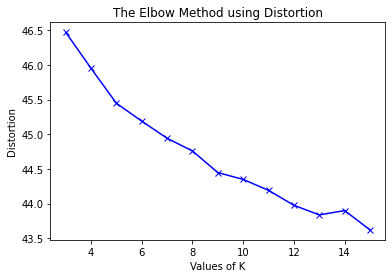

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

3 : 7680968.960027953
4 : 7493183.291277797
5 : 7315255.606748952
6 : 7212998.745309328
7 : 7129117.482557129
8 : 7050482.065393381
9 : 6968609.648957039
10 : 6922919.676517982
11 : 6845829.545940169
12 : 6801011.228586637
13 : 6760947.046185997
14 : 6713399.393021002
15 : 6660543.8028311


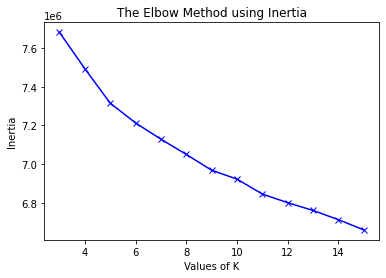

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
cluNum = 5
kmeans7 = KMeans(n_clusters=cluNum, random_state=0).fit(normalised)                  # By elbow method we see that optimum number of cluster is 7

In [ ]:
(kmeans7.labels_)

array([1, 0, 1, ..., 2, 2, 1], dtype=int32)

In [ ]:
clNames = []
for i in range(cluNum):
  clNames.append([])
for i in range(len(normalised)):
  #if i < 10:
    #print(clNames)
  clNames[kmeans7.labels_[i]].append(i)

1 th cluster contains 120 members
2 th cluster contains 622 members
3 th cluster contains 1474 members
4 th cluster contains 412 members
5 th cluster contains 165 members


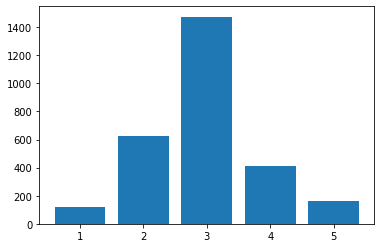

In [ ]:
for i in range(cluNum):
  print(i+1, "th cluster contains", len(clNames[i]), "members")

plt.bar(range(1,cluNum+1), [len(clNames[i]) for i in range(cluNum)])
plt.show()

In [ ]:
for i in range(cluNum) :
  print(clNames[i])
  print(len(clNames[i]))

[1, 3, 7, 36, 52, 53, 67, 102, 175, 180, 199, 236, 243, 343, 358, 373, 386, 390, 417, 434, 457, 458, 462, 475, 478, 574, 604, 618, 619, 642, 661, 698, 721, 737, 834, 850, 851, 862, 878, 896, 897, 901, 904, 920, 921, 939, 977, 981, 1007, 1015, 1017, 1019, 1080, 1081, 1101, 1105, 1117, 1143, 1191, 1229, 1241, 1258, 1264, 1282, 1285, 1292, 1295, 1336, 1343, 1344, 1377, 1395, 1405, 1438, 1528, 1536, 1569, 1582, 1583, 1588, 1598, 1640, 1683, 1703, 1711, 1749, 1812, 1838, 1839, 1859, 1865, 1886, 1899, 1911, 1960, 1974, 1995, 2024, 2036, 2056, 2073, 2172, 2211, 2241, 2276, 2331, 2368, 2372, 2380, 2384, 2396, 2487, 2508, 2513, 2572, 2590, 2618, 2642, 2688, 2768]
120
[0, 2, 4, 13, 17, 21, 25, 35, 37, 45, 47, 54, 56, 59, 60, 61, 63, 64, 68, 70, 77, 80, 94, 96, 100, 105, 106, 108, 110, 116, 117, 120, 128, 131, 140, 143, 146, 149, 156, 167, 194, 196, 197, 210, 213, 215, 219, 227, 229, 230, 253, 256, 260, 268, 270, 275, 279, 281, 288, 290, 291, 292, 294, 301, 302, 304, 313, 318, 319, 321, 327, 331,

In [ ]:
name = []
gender = []
meaning = []

for i in range(len(text)) :
  for j in range(len(text[i])) :
    if len(text[i][j]) > 1 :
      nam = text[i][j].split(' - ')[0]
      name.append(nam)
      gend = text[i][j].split(' - ')[1]
      gender.append(gend)
      mea = text[i][j].split(' - ')[-1]
      meaning.append(mea)

print(len(name),len(gender),len(meaning))
print(text)

2793 2793 2793
[['Anvika - Female - powerful and complete, the powerful and strong one', 'Aahana - Female - inner light, immortal, born during the day, first rise of the sun, the name aahana has the meaning of someone like angel,  someone sweet and charming like rose it also means first sun rays', 'Amaya - Female - night rain, immeasurable, without limit, the beautiful night rain', 'Aadhya - Female - first power, goddess durga, first, unequalled, perfect, the earth, another ornament, aadhya means the the first power,  the beginning,  it is also an another name of goddess durga', 'Aanaya - Female - without a superior, god has shown favour', 'Adrija - Female - of the mountain, another name of goddess parvati, name of parvati', 'Aditi - Female - mother of the gods, liberty, perfection, creativity, freedom, safety, abundance', 'Aayush - Male - age, man, long lived, one with long life, duration of life, long life, blessing, a variant name of aaush', 'Arish - Male - first ray of sun, sky', '

In [ ]:
# data_top = df.head()  

col = ['X','Y']
idx = words #df.index.values.tolist()#[row for row in data_top.index]
print(idx)

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents,index = idx, columns = col)

principalDf

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,X,Y
the,5.387897,0.203127
",",4.705184,1.394855
.,5.047544,0.601054
of,5.244793,0.052276
to,5.493763,-0.089621
...,...,...
chanty,-0.710924,-0.059500
kronik,-0.429081,-0.085026
rolonda,-0.807986,0.117557
zsombor,-1.684709,0.256548


In [ ]:
# word_weight = {}
keyX = list(principalDf['X'])
keyY = list(principalDf['Y'])

weights = list(tuple(zip(keyX, keyY)))  
word_weight = dict(zip(words,weights))
word_weight

{'the': (5.38789701461792, 0.20312684774398804),
 ',': (4.705184459686279, 1.3948553800582886),
 '.': (5.047543525695801, 0.6010544896125793),
 'of': (5.24479341506958, 0.05227641388773918),
 'to': (5.493762969970703, -0.08962142467498779),
 'and': (5.146856307983398, 0.8682788014411926),
 'in': (5.356583595275879, 0.07340969890356064),
 'a': (5.328619003295898, 0.2589351534843445),
 '"': (4.146879196166992, 2.0254571437835693),
 "'s": (5.288820266723633, 2.1233136653900146),
 'for': (5.686386585235596, 0.6258319020271301),
 '-': (5.587151050567627, 0.7838116884231567),
 'that': (5.516167163848877, 1.7113292217254639),
 'on': (5.474334716796875, 0.3727132976055145),
 'is': (5.173444747924805, 0.5143974423408508),
 'was': (5.096783638000488, 1.13372004032135),
 'said': (4.4588541984558105, 4.338193893432617),
 'with': (5.546194076538086, 0.5327425599098206),
 'he': (5.33388090133667, 2.023632764816284),
 'as': (5.416177272796631, 1.053107500076294),
 'it': (5.663443088531494, 0.61671966

In [ ]:
def getWeight(s,alph,word_weights = word_weight,words = words) :
  word_tokens = word_tokenize(s)
  # print(word_tokens)
  tokens = []
  for i in word_tokens : 
    if i not in stopword :
      tokens.append(i)
  
  value = 0
  # print(tokens)

  for token in tokens :
    if token in words :
      if alph == 'X' :
        value += word_weight[token][0]
      else :
        value += word_weight[token][1]

  return value

# getWeight('he is, here to, play hockey',principalDf,'X')
def xOro(l) :
  if l == 'Female' :
    return 'x'
  
  elif l == 'Male' :
    return '.'

  elif l == 'Unisex' :
    return '*'

120 120
120
120
     Name  Gender                                            Meaning
0  Aahana  Female  inner light, immortal, born during the day, fi...
1  Aadhya  Female  first power, goddess durga, first, unequalled,...
2  Aayush    Male  age, man, long lived, one with long life, dura...
3   Aarit    Male  one who seeks the right direction, honoured, a...
4   Aafia  Female  vigor, good health, well being, the name signi...


622 622
622
622
     Name  Gender                                            Meaning
0  Anvika  Female  powerful and complete, the powerful and strong...
1   Amaya  Female  night rain, immeasurable, without limit, the b...
2  Aanaya  Female           without a superior, god has shown favour
3   Ashar    Male  fourth prayer of the day, one who has wisdom, ...
4  Aahaan    Male  dawn, sunrise, morning glory, first ray of lig...


1474 1474
1474
1474
      Name  Gender                                            Meaning
0   Adrija  Female  of the mountain, another n

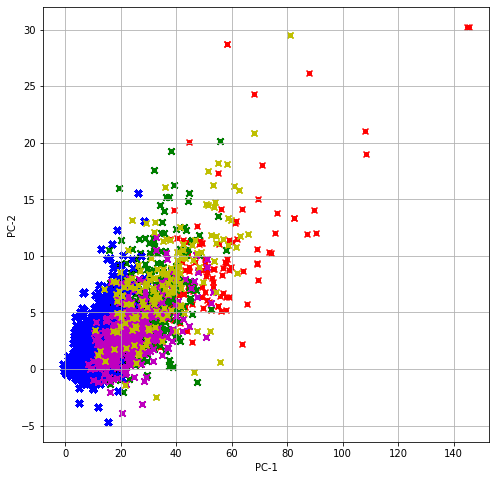

In [ ]:
colours = ['r','g','b','m','y','#FFC0CB','#D3D3D3','#FFA500','#ADD8E6']
plt.figure(figsize = (8,8))
for j in range(cluNum) :
  df1 = pd.DataFrame()
  name1 = []
  meaning1 = []
  gender1 = []
  weightX = []
  weightY = []

  for i in clNames[j] :
    name1.append(name[i])
    gender1.append(gender[i])
    meaning1.append(meaning[i])
    weightX.append(getWeight(meaning[i],'X'))
    weightY.append(getWeight(meaning[i],'Y'))

  print(len(weightX),len(name1))

  df1['Name'] = name1
  df1['Gender'] = gender1
  df1['Meaning'] = meaning1
  # df['X'] = weightX
  # df['Y'] = weightY
  print(len(weightX))
  print(len(weightY))

  for i in clNames[j] :
    try :
      plt.scatter(weightX,weightY,c = colours[j], marker = xOro(gender1[i]))
    except :
      pass
  # plt.scatter(weightX,weightY,c = colours[j], marker ='.')

  print(df1.head())
  print('\n')

plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.grid()
plt.show()

In [ ]:
# Finding average of the word vectors of each cluster
avg = []

for i in range(8) :
  sum = [0] * 100                                                               # Array for the 100d sum of len(clNames[i]) values
  for j in clNames[i] :
    for k in range(0,100) :
      sum[k] += normalised[j][k]
  avg.append(sum)

for i in range(8) :                                                             # Contains 7 (no. of cluster) 1D array with 100 elements 
  for j in range(0,100) :
    avg[i][j] /= len(clNames[i])
  print(avg[i])
                                                     

print(avg)

[0.015972053848596436, 4.223880698078555, 4.230118181531386, -0.3949561278003797, -1.3795264193866474, 7.415429997308798, -2.0624126590879697, -1.8572746845968142, -1.6461157470009844, -0.122363444226261, -2.176241083083055, -1.350831661591229, 3.8962431345387984, -4.46175000731656, 1.3476305553061838, -1.423143189337021, -0.0002893718657796007, 1.2369609216644635, -0.48284576155521514, 7.70101894130225, 2.162902574386214, -0.16547596663141748, -2.8144079997393, -5.365327989968294, 4.123739950851339, 4.450161125873649, -3.1951722940569622, -1.0163930955457665, -0.6183084121771256, -1.1662006821300583, -1.6961988604637142, 4.031830738501925, -0.14362058312175954, -3.5108934877905384, 3.3748179720683713, 1.428975076687172, -3.9418834916709518, 2.0687639068594526, 1.5451541254314327, -3.641454894802885, -0.7670920798598266, 0.4977109868046194, 4.109377188498484, -2.2026245767248707, -1.9535256552047653, -1.6533857939568446, 4.796639070804949, 1.8165664485625375, 1.0249532183113157, -6.063

In [ ]:
def euclidDist(df,word,avgVec) :
  sum = 0
  for i in range(0,100) :
    dis = df.loc[word,i] - avgVec[i]                                            # Difference between the ith dimention of vector
    dis = dis ** 2
    sum += dis                                                                  # Sum of square of difference in distance
  sum = math.sqrt(sum) 

  return sum

dists = []
for i in range(8) :
  fdfr = 8 - i
  print(fdfr)
  clusDist = []
  for w in df.index :
    distance = euclidDist(df,w,avg[i])
    # print(distance)
    t = (w,distance)                                                            # Tuple consisting of the word and its euclidean disttance
    clusDist.append(t)
    # print(clusDist)
  dists.append(clusDist)
  # print(dists)

print(dists)

8


KeyboardInterrupt: ignored

In [ ]:
# Copied from GeeksForGeek

def merge(arr, l, m, r): 
    n1 = m - l + 1
    n2 = r- m 
  
    # create temp arrays 
    L = [0] * (n1) 
    R = [0] * (n2) 
  
    # Copy data to temp arrays L[] and R[] 
    for i in range(0 , n1): 
        L[i] = arr[l + i] 
  
    for j in range(0 , n2): 
        R[j] = arr[m + 1 + j] 
  
    # Merge the temp arrays back into arr[l..r] 
    i = 0     # Initial index of first subarray 
    j = 0     # Initial index of second subarray 
    k = l     # Initial index of merged subarray 
  
    while i < n1 and j < n2 : 
        if L[i][1] <= R[j][1]: 
            arr[k] = L[i] 
            i += 1
        else: 
            arr[k] = R[j] 
            j += 1
        k += 1
  
    # Copy the remaining elements of L[], if there 
    # are any 
    while i < n1: 
        arr[k] = L[i] 
        i += 1
        k += 1
  
    # Copy the remaining elements of R[], if there 
    # are any 
    while j < n2: 
        arr[k] = R[j] 
        j += 1
        k += 1
  
# l is for left index and r is right index of the 
# sub-array of arr to be sorted 
def mergeSort(arr,l,r): 
    if l < r: 
  
        # Same as (l+r)//2, but avoids overflow for 
        # large l and h 
        m = (l+(r-1))//2
  
        # Sort first and second halves 
        mergeSort(arr, l, m) 
        mergeSort(arr, m+1, r) 
        merge(arr, l, m, r) 

In [ ]:
for i in range(0,8) :
  print(i)
  mergeSort(dists[i],0,len(dists[i])-1)

In [ ]:
for i in range(0,8) :
  print('Closest Words to the average of Cluster '+ str(i+1) + ' are : ')
  # dists[i] = dists[i]
  # for j in range(0,15) :
  #   print(dists[i][j][0])
  j = 0
  k = 0
  while k != 15 :
    # print('k = ',k)
    if dists[i][j][0] not in stopword :
      k += 1
      print(dists[i][j][0])
    j += 1

Closest Words to the average of Cluster 1 are : 
god
life
man
love
great
one
good
true
like
beautiful
little
kind
way
woman
even
Closest Words to the average of Cluster 2 are : 
one
's
life
time
man
great
people
good
n't
first
like
even
would
many
much
Closest Words to the average of Cluster 3 are : 
good
kind
beautiful
sense
really
something
'm
life
love
great
're
little
feel
always
thing
Closest Words to the average of Cluster 4 are : 
water
small
one
dark
red
large
like
black
long
little
green
around
light
blue
white
Closest Words to the average of Cluster 5 are : 
good
n't
people
much
even
something
way
're
life
really
better
one
make
would
could
Closest Words to the average of Cluster 6 are : 
one
people
's
many
would
n't
time
could
life
even
much
like
good
two
first
Closest Words to the average of Cluster 7 are : 
god
name
king
father
life
great
one
holy
lord
man
love
known
people
son
's


In [ ]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
document = []

for i in range(cluNum) :
  clusMean = []
  for j in clNames[i] :
    clusMean.append(meaning[j])
  clusMean = ' '.join(clusMean)
  document.append(clusMean)

# for i in range(7) :
#   print(document[i])
# print(len(document))

documents = pd.DataFrame()
lst = [i+1 for i in range(0,cluNum)]
for i in range(cluNum) :
  documents['Cluster'] = lst
  documents['Meaning'] = document

documents

,Cluster,Meaning
0,1,"god answered, god was gracious, a variation of..."
1,2,"sunrays, charismatic personality, bright as a ..."
2,3,"peace, the word has a meaning of peace, or th..."
3,4,"blessed and victorious, little mare, one of ma..."
4,5,"name of a sage, one who humbles even the mount..."
5,6,"prince, aahil is an arabic word that means ""gr..."


In [ ]:
# for i in range(7) :
processed_docs = documents['Meaning'].map(preprocess)
processed_docs.head()

0    [answer, graciou, variat, aniya, uniqu, inspir...
1    [sunray, charismat, person, bright, charismat,...
2    [peac, word, mean, peac, make, peac, bridgesth...
3    [bless, victori, littl, mare, name, goddess, s...
4    [sage, humbl, mountain, star, canopu, cleanser...
Name: Meaning, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

In [ ]:
# dictionary.filter_extremes(no_below=0.01, no_above=1, keep_n=100)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

In [ ]:
# bow_doc_4310 = bow_corpus[0]
# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                dictionary[bow_doc_4310[i][0]], 
# bow_doc_4310[i][1]))

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.017*"lord" + 0.012*"mean" + 0.011*"person" + 0.007*"power" + 0.006*"beauti" + 0.006*"variant" + 0.006*"good" + 0.005*"light" + 0.005*"love" + 0.005*"nobl"
Topic: 1 
Words: 0.020*"lord" + 0.017*"person" + 0.017*"mean" + 0.011*"light" + 0.010*"variant" + 0.008*"king" + 0.008*"beauti" + 0.008*"bear" + 0.008*"power" + 0.007*"love"
Topic: 2 
Words: 0.017*"person" + 0.015*"lord" + 0.012*"mean" + 0.008*"power" + 0.007*"king" + 0.007*"bear" + 0.007*"love" + 0.006*"light" + 0.006*"variant" + 0.005*"bright"
Topic: 3 
Words: 0.014*"lord" + 0.013*"person" + 0.011*"mean" + 0.007*"variant" + 0.007*"light" + 0.007*"bear" + 0.006*"king" + 0.006*"bright" + 0.006*"like" + 0.006*"power"
Topic: 4 
Words: 0.021*"person" + 0.020*"lord" + 0.019*"mean" + 0.009*"love" + 0.008*"variant" + 0.008*"king" + 0.008*"beauti" + 0.008*"light" + 0.008*"nobl" + 0.008*"power"
Topic: 5 
Words: 0.021*"person" + 0.017*"mean" + 0.016*"lord" + 0.009*"love" + 0.009*"beauti" + 0.008*"power" + 0.008*"variant" + 

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"feelin" + 0.000*"flora" + 0.000*"baptist" + 0.000*"sophist" + 0.000*"archon" + 0.000*"fauna" + 0.000*"trait" + 0.000*"upgrad" + 0.000*"burrow" + 0.000*"whou"
Topic: 1 Word: 0.000*"crest" + 0.000*"chumchum" + 0.000*"unshaken" + 0.000*"speak" + 0.000*"beau" + 0.000*"butter" + 0.000*"consellor" + 0.000*"birch" + 0.000*"champion" + 0.000*"phrophetess"
Topic: 2 Word: 0.000*"author" + 0.000*"settlement" + 0.000*"impli" + 0.000*"mortal" + 0.000*"pamper" + 0.000*"east" + 0.000*"black" + 0.000*"seller" + 0.000*"studi" + 0.000*"duski"
Topic: 3 Word: 0.001*"homeless" + 0.001*"abidin" + 0.001*"zainul" + 0.000*"exot" + 0.000*"magnanim" + 0.000*"siva" + 0.000*"christoph" + 0.000*"herbivor" + 0.000*"fleet" + 0.000*"ephemer"
Topic: 4 Word: 0.000*"gleam" + 0.000*"crest" + 0.000*"ardour" + 0.000*"hymn" + 0.000*"manor" + 0.000*"shing" + 0.000*"strongest" + 0.000*"recollect" + 0.000*"sand" + 0.000*"meanng"
Topic: 5 Word: 0.000*"beriah" + 0.000*"solar" + 0.000*"bliss" + 0.000*"peopl" 

In [ ]:
processed_docs[0]

['answer',
 'graciou',
 'variat',
 'aniya',
 'uniqu',
 'inspir',
 'prais',
 'favour',
 'excel',
 'lightn',
 'strong',
 'quick',
 'lighten',
 'larg',
 'expans',
 'emot',
 'brilliant',
 'intellig',
 'brilliant',
 'intellig',
 'gift',
 'honor',
 'nobl',
 'goddess',
 'parvati',
 'goddess',
 'durga',
 'goddess',
 'durga',
 'beauti',
 'ashim',
 'ashim',
 'beauti',
 'handsom',
 'devi',
 'name',
 'goddess',
 'know',
 'young',
 'krishna',
 'uniqu',
 'girl',
 'finnish',
 'aahan',
 'aahna',
 'aamani',
 'aanan',
 'aayam',
 'ahaan',
 'ahan',
 'ahim',
 'ahnay',
 'ahnna',
 'meadow',
 'peac',
 'variant',
 'airlea',
 'spell',
 'aysa',
 'mean',
 'moonlik',
 'ê¾isha',
 'spell',
 'aisha',
 'live',
 'womanli',
 'gift',
 'prosper',
 'wealth',
 'sanskrit',
 'recit',
 'holi',
 'quran',
 'recit',
 'holi',
 'quran',
 'nobl',
 'defend',
 'mankind',
 'eccentr',
 'honour',
 'have',
 'split',
 'person',
 'immort',
 'pray',
 'time',
 'fast',
 'great',
 'deal',
 'lead',
 'prosper',
 'long',
 'life',
 'true',
 'truli'

In [ ]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9998680949211121	 
Topic: 0.021*"person" + 0.020*"lord" + 0.019*"mean" + 0.009*"love" + 0.008*"variant" + 0.008*"king" + 0.008*"beauti" + 0.008*"light" + 0.008*"nobl" + 0.008*"power"


In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8796173334121704	 
Topic: 0.001*"beriah" + 0.001*"land" + 0.000*"birch" + 0.000*"peopl" + 0.000*"island" + 0.000*"speak" + 0.000*"lion" + 0.000*"boar" + 0.000*"grow" + 0.000*"pervas"

Score: 0.10130366683006287	 
Topic: 0.000*"author" + 0.000*"settlement" + 0.000*"impli" + 0.000*"mortal" + 0.000*"pamper" + 0.000*"east" + 0.000*"black" + 0.000*"seller" + 0.000*"studi" + 0.000*"duski"

Score: 0.019042231142520905	 
Topic: 0.001*"homeless" + 0.001*"abidin" + 0.001*"zainul" + 0.000*"exot" + 0.000*"magnanim" + 0.000*"siva" + 0.000*"christoph" + 0.000*"herbivor" + 0.000*"fleet" + 0.000*"ephemer"


In [ ]:
for i in range(0,cluNum) :
  print('CLuster ',i+1)
  for index, score in sorted(lda_model_tfidf[bow_corpus[i]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))
  print('\n')

CLuster  1

Score: 0.8796975016593933	 
Topic: 0.001*"beriah" + 0.001*"land" + 0.000*"birch" + 0.000*"peopl" + 0.000*"island" + 0.000*"speak" + 0.000*"lion" + 0.000*"boar" + 0.000*"grow" + 0.000*"pervas"

Score: 0.10103877633810043	 
Topic: 0.000*"author" + 0.000*"settlement" + 0.000*"impli" + 0.000*"mortal" + 0.000*"pamper" + 0.000*"east" + 0.000*"black" + 0.000*"seller" + 0.000*"studi" + 0.000*"duski"

Score: 0.019226940348744392	 
Topic: 0.001*"homeless" + 0.001*"abidin" + 0.001*"zainul" + 0.000*"exot" + 0.000*"magnanim" + 0.000*"siva" + 0.000*"christoph" + 0.000*"herbivor" + 0.000*"fleet" + 0.000*"ephemer"


CLuster  2

Score: 0.9998154640197754	 
Topic: 0.001*"beriah" + 0.001*"land" + 0.000*"birch" + 0.000*"peopl" + 0.000*"island" + 0.000*"speak" + 0.000*"lion" + 0.000*"boar" + 0.000*"grow" + 0.000*"pervas"


CLuster  3

Score: 0.9998092651367188	 
Topic: 0.001*"beriah" + 0.001*"land" + 0.000*"birch" + 0.000*"peopl" + 0.000*"island" + 0.000*"speak" + 0.000*"lion" + 0.000*"boar" + 